In [17]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [21]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [22]:
# @title Libraries
import io
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# @title Get Data
data = pd.read_csv(io.BytesIO(uploaded['iris.csv']))
print(data.info(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


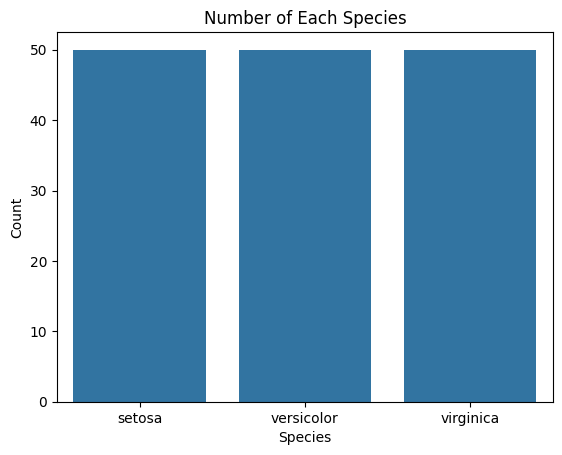

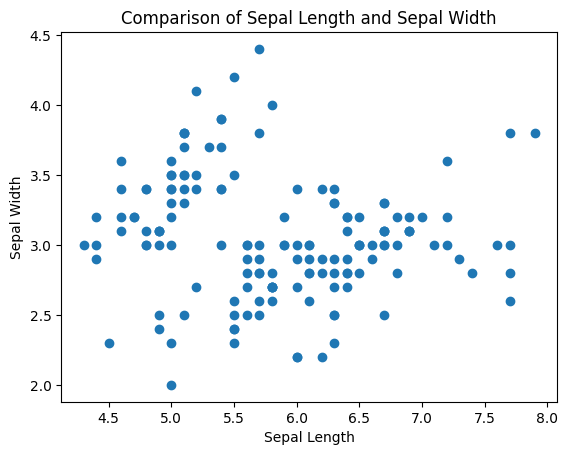

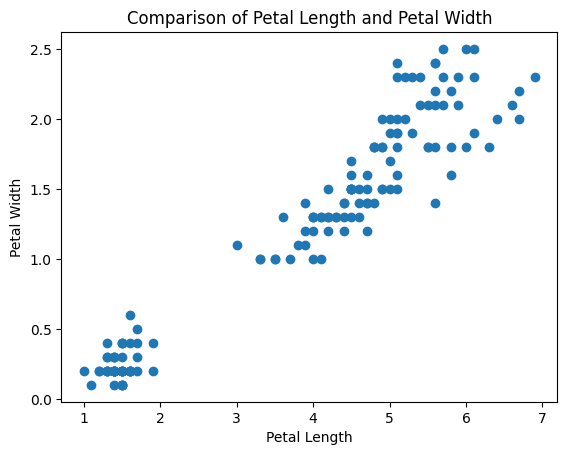

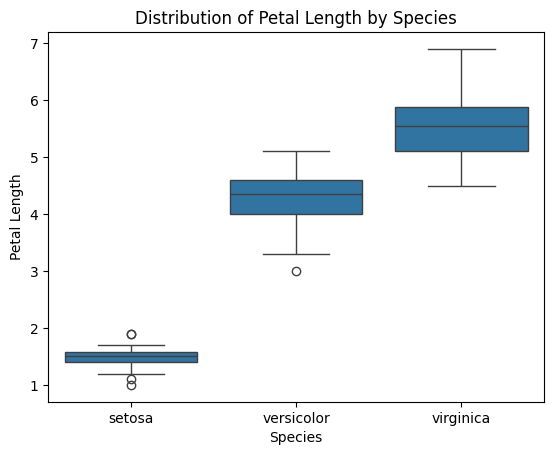

In [24]:
# @title Visualize Data

# Bar chart
sns.countplot(data=data, x='species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Number of Each Species')
plt.show()

# Scatter plot
plt.scatter(data['sepal_length'], data['sepal_width'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Comparison of Sepal Length and Sepal Width')
plt.show()

# Scatter plot 2
plt.scatter(data['petal_length'], data['petal_width'])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Comparison of Petal Length and Petal Width')
plt.show()

# Box plot
sns.boxplot(data=data, x='species', y='petal_length')
plt.xlabel('Species')
plt.ylabel('Petal Length')
plt.title('Distribution of Petal Length by Species')
plt.show()

<Axes: >

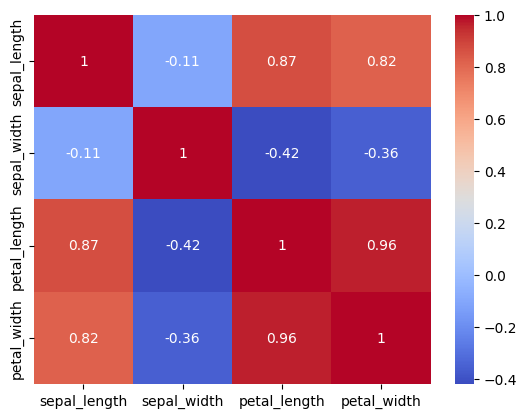

In [25]:
# @title Visualize Data - Heatmap
# Heatmap
numeric_attributes = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
correlation_matrix = data[numeric_attributes].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [26]:
# @title Preprocessing

# Splitting the dataset in independent and dependent variables
X = data.iloc[:,:4].values
y = data['species'].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = None)

# Feature Scaling to bring the variable in a single scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train[:5])
print('\n',y_train[:5])
print('\n',X_test[:5])
print('\n',y_test[:5])

[[ 0.91816886 -0.186059    0.93350365  1.17536178]
 [ 2.41213852 -1.08816325  1.89238957  1.57192245]
 [-0.94929323  0.26499312 -1.32269852 -1.20400227]
 [-0.20230839 -0.63711113  0.76428849  1.17536178]
 [-0.94929323  0.49051919 -1.20988842 -1.20400227]]

 ['virginica' 'virginica' 'setosa' 'virginica' 'setosa']

 [[ 1.29166127  0.26499312  1.32833903  1.57192245]
 [ 0.66917391  0.49051919  0.65147838  0.64661421]
 [-1.0737907   0.03946706 -1.15348336 -1.33618916]
 [ 1.1671638  -0.186059    0.82069354  0.7788011 ]
 [-0.07781092 -0.63711113  0.31304805  0.25005354]]

 ['virginica' 'versicolor' 'setosa' 'versicolor' 'versicolor']


In [27]:
# @title Classify

# Create a Gaussian Classifier
nbClassifier = GaussianNB()
nbClassifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = nbClassifier.predict(X_test)
print(y_pred)

['virginica' 'versicolor' 'setosa' 'virginica' 'versicolor' 'setosa'
 'virginica' 'virginica' 'versicolor' 'versicolor' 'virginica' 'virginica'
 'versicolor' 'versicolor' 'versicolor' 'virginica' 'virginica'
 'versicolor' 'virginica' 'virginica' 'virginica' 'virginica' 'setosa'
 'versicolor' 'versicolor' 'setosa' 'virginica' 'versicolor' 'virginica'
 'virginica']


In [28]:
# @title Testing
#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
print(y_compare)

[['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['versicolor' 'virginica']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['virginica' 'virginica']
 ['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['virginica' 'versicolor']
 ['virginica' 'virginica']
 ['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['virginica' 'virginica']
 ['virginica' 'virginica']
 ['virginica' 'virginica']
 ['virginica' 'virginica']
 ['setosa' 'setosa']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['virginica' 'virginica']
 ['virginica' 'virginica']]


In [29]:
# @title Evaluation
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
#finding accuracy from the confusion matrix.
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

[[ 4  0  0]
 [ 0 10  1]
 [ 0  1 14]]
0.9333333333333333


In [33]:
# @title UDAI
import numpy as np

sepal_width = 3 #@param {type:"number"}
sepal_length = 6 #@param {type:"number"}
petal_width = 7 #@param {type:"number"}
petal_length = 3.2 #@param {type:"number"}

input = np.array([sepal_width, sepal_length, petal_width, petal_length]).reshape(1, -1)
output = nbClassifier.predict(input)
print(output)

['virginica']
